# Disciplina: Softwares para uso em Ciência de Dados II
# Prof. Marcos Guimarães
# Aluno: Simone de Araújo Góes Assis

   # O PANORAMA MUNDIAL DAS RELIGIÕES E O CRISTIANISMO

# Introdução

Em todo o mundo, nove em cada dez pessoas se identificam com algum grupo religioso. Para muitos desses seguidores, a religião desempenha um papel fundamental na influência de todos os aspectos da vida cotidiana.

Religiões distintas são encontradas em todo o mundo. Estima-se que existam mais de 4.000 religiões ao redor do mundo (Kunh, 2004)! São provenientes dos mais diversos contextos culturais e históricos, com diferentes perspectivas acerca da essência da vida. 

Entretanto, apesar de tamanha pulverização de religiões, pesquisadores teológicos, tais como Kunh (1992, 2004), argumenta que as maiores religiões do mundo se dividem em duas principais ramificações: a) as religiões abraâmicas (islamismo, cristianismo, judaísmo, etc.), e b) as religiões indianas (hinduísmo, budismo, etc.). Cada religião destas apresentam  tendências evolutivas e concentrações geográficas específicas. 

Pergunta-se: ***Quais são as religiões com mais seguidores em cada região do mundo? Quais as maiores religiões do mundo e onde elas se concentram? Qual é a tendência de evolução da população de seguidores de cada uma destas religiões?*
**

Portanto, para fins deste trabalho, foi realizada uma análise descritiva e exploratória das estimativas populacionais de cada religião e seus respectivos recortes geográficos de atuação mundial. 

As religiões serão delimitadas em cinco grandes grupos religiosos, de acordo com a tipologia de Khung (2004): Cristianismo, Judaísmo, Islamismo, Budismo, e Hinduísmo. As demais religiões foram agrupadas na categoria especificada para outras religiões. Também foi incluída uma categoria para os que se consideram sem religião, ou seja, não são seguidores religiosos. 

Os banco de dados adotados neste trabalho (https://www.kaggle.com/umichigan/world-religions) foram oriundos do Instituto de Pesquisas Pew e de outras fontes de informações demográficas internacionais da ONU e Banco Mundial. 



# Objetivo

Analisar a distribuição da população mundial em relação as suas preferências religiosas, a saber: Cristianismo,Judaísmo, Islamismo, Budismo, Hinduísmo, bem como o comportamento da maior religião mundial.

# Tratamento da base de dados

In [ ]:
# Carregando a base de dados

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# fonte: # fonte: http://www.portalaction.com.br/analise-de-regressao/12-estimacao-dos-parametros-do-modelo


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [ ]:
religion= pd.read_csv('/kaggle/input/world-religions/regional.csv')
religion1= pd.read_csv('/kaggle/input/world-religions/national.csv')


In [ ]:
# Tratamento da base de dados das populações religiosas distribuídas pelas regiões mundiais

# 5 regiões

#Agrupar os grupos religiosos da base religion (regiões globais)

religion['outras'] = religion['zoroastrianism_all'] + religion['sikhism_all'] + religion['shinto_all'] + religion['baha’i_all'] + religion['jainism_all'] + religion['confucianism_all'] + religion['syncretism_all'] + religion['animism_all'] + religion['otherreligion_all']
religion['cristianismo'] = religion['christianity_all']
religion['judaismo'] = religion['judaism_all']
religion['islamismo'] = religion['islam_all']
religion['budismo'] = religion['buddhism_all']
religion['hinduismo'] = religion['hinduism_all']
religion['semreligiao'] = religion['noreligion_all']
religion['total'] = religion['religion_all']

#Criar as variáveis com as taxas populacionais regionais dos grupos religiosos
religion['cristianismo_pc'] = religion['cristianismo']/religion['population']
religion['judaismo_pc'] = religion['judaism_all']/religion['population']
religion['islamismo_pc'] = religion['islam_all']/religion['population']
religion['budismo_pc'] = religion['buddhism_all']/religion['population']
religion['hinduismo_pc'] = religion['hinduism_all']/religion['population']
religion['semreligiao_pc'] = religion['noreligion_all']/religion['population']
religion['total_pc'] = religion['religion_all']/religion['population']

#Criar as variáveis com as taxas populacionais dos grupos religiosos em relacão a população mundial

religion['cristianismo_wpc'] = religion['cristianismo']/religion['world_population']
religion['judaismo_wpc'] = religion['judaism_all']/religion['world_population']
religion['islamismo_wpc'] = religion['islam_all']/religion['world_population']
religion['budismo_wpc'] = religion['buddhism_all']/religion['world_population']
religion['hinduismo_wpc'] = religion['hinduism_all']/religion['world_population']
religion['semreligiao_wpc'] = religion['noreligion_all']/religion['world_population']
religion['total_wpc'] = religion['religion_all']/religion['world_population']

In [ ]:
# Tratamento da base de dados das populações religiosas distribuídas pelos países

# 200 países

#Agrupar os grupos religiosos da base religion1 (paises)

religion1['outras'] = religion1['zoroastrianism_all'] + religion['sikhism_all'] + religion['shinto_all'] + religion['baha’i_all'] + religion['jainism_all'] + religion['confucianism_all'] + religion['syncretism_all'] + religion['animism_all'] + religion['otherreligion_all']
religion1['cristianismo'] = religion1['christianity_all']
religion1['judaismo'] = religion1['judaism_all']
religion1['islamismo'] = religion1['islam_all']
religion1['budismo'] = religion1['buddhism_all']
religion1['hinduismo'] = religion1['hinduism_all']
religion1['semreligiao'] = religion1['noreligion_all']
religion1['total'] = religion1['religion_all']

#Criar as variáveis com as taxas populacionais regionais dos grupos religiosos
religion1['cristianismo_pc'] = religion1['cristianismo']/religion1['population']
religion1['judaismo_pc'] = religion1['judaism_all']/religion1['population']
religion1['islamismo_pc'] = religion1['islam_all']/religion1['population']
religion1['budismo_pc'] = religion1['buddhism_all']/religion1['population']
religion1['hinduismo_pc'] = religion1['hinduism_all']/religion1['population']
religion1['semreligiao_pc'] = religion1['noreligion_all']/religion1['population']
religion1['total_pc'] = religion1['religion_all']/religion1['population']

#Criar as variáveis com as taxas populacionais dos grupos religiosos em relacão a população mundial

religion1['cristianismo_wpc'] = religion1['cristianismo']/religion['world_population']
religion1['judaismo_wpc'] = religion1['judaism_all']/religion['world_population']
religion1['islamismo_wpc'] = religion1['islam_all']/religion['world_population']
religion1['budismo_wpc'] = religion1['buddhism_all']/religion['world_population']
religion1['hinduismo_wpc'] = religion1['hinduism_all']/religion['world_population']
religion1['semreligiao_wpc'] = religion1['noreligion_all']/religion['world_population']
religion1['total_wpc'] = religion1['religion_all']/religion['world_population']

In [ ]:
# Dropando as variaveis que foram não serão utilizadas nas bases religion (regiões mundiais) e religion1 (países)

religion.drop(columns=['christianity_protestant','christianity_romancatholic','christianity_easternorthodox','christianity_anglican','christianity_other','judaism_orthodox','judaism_conservative','judaism_reform','judaism_other','islam_sunni','islam_shi’a','islam_ibadhi','islam_nationofislam','islam_alawite','islam_ahmadiyya','islam_other','buddhism_mahayana','buddhism_theravada','buddhism_other','shinto_all','taoism_all','protestant_percent','romancatholic_percent','easternorthodox_percent','anglican_percent','otherchristianity_percent','christianity_percent','orthodox_percent','conservative_percent','reform_percent','otherjudaism_percent','judaism_percent','sunni_percent','shi’a_percent','ibadhi_percent','nationofislam_percent','alawite_percent','ahmadiyya_percent','otherislam_percent','islam_percent','mahayana_percent','theravada_percent','otherbuddhism_percent','buddhism_percent','zoroastrianism_percent','hinduism_percent','sikhism_percent','shinto_percent','baha’i_percent','taoism_percent','jainism_percent','confucianism_percent','syncretism_percent','animism_percent','noreligion_percent','otherreligion_percent','religion_sumpercent','total_percent','worldpopulation_percent'],inplace=True)
religion.drop(columns=['christianity_all','judaism_all','islam_all','buddhism_all','zoroastrianism_all','hinduism_all','sikhism_all','baha’i_all','jainism_all','confucianism_all','syncretism_all','animism_all','noreligion_all','otherreligion_all','religion_all'],inplace=True)

religion1.drop(columns=['christianity_protestant','christianity_romancatholic','christianity_easternorthodox','christianity_anglican','christianity_other','judaism_orthodox','judaism_conservative','judaism_reform','judaism_other','islam_sunni','islam_shi’a','islam_ibadhi','islam_nationofislam','islam_alawite','islam_ahmadiyya','islam_other','buddhism_mahayana','buddhism_theravada','buddhism_other','shinto_all','taoism_all','protestant_percent','romancatholic_percent','easternorthodox_percent','anglican_percent','otherchristianity_percent','christianity_percent','orthodox_percent','conservative_percent','reform_percent','otherjudaism_percent','judaism_percent','sunni_percent','shi’a_percent','ibadhi_percent','nationofislam_percent','alawite_percent','ahmadiyya_percent','otherislam_percent','islam_percent','mahayana_percent','theravada_percent','otherbuddhism_percent','buddhism_percent','zoroastrianism_percent','hinduism_percent','sikhism_percent','shinto_percent','baha’i_percent','taoism_percent','jainism_percent','confucianism_percent','syncretism_percent','animism_percent','noreligion_percent','otherreligion_percent','religion_sumpercent','total_percent'],inplace=True)
religion1.drop(columns=['christianity_all','judaism_all','islam_all','buddhism_all','zoroastrianism_all','hinduism_all','sikhism_all','baha’i_all','jainism_all','confucianism_all','syncretism_all','animism_all','noreligion_all','otherreligion_all','religion_all'],inplace=True)

In [ ]:
# Criando as bases somente com os anos de 1980, 1990, 2000 e 2010

tx1 = religion[religion['year'] == 1980 ]
tx2= religion[religion['year'] == 1990 ]
tx3= religion[religion['year'] == 2000 ]
tx4 = religion[religion['year'] == 2010]

tx80= religion1[religion1['year'] == 1980 ]
tx90= religion1[religion1['year'] == 1990 ]
tx00= religion1[religion1['year'] == 2000 ]
tx10= religion1[religion1['year'] == 2010 ]

# Empilhando as bases com o corte de análise dos 4 anos (1980, 1990, 2000, 2010)
result = tx1.append([tx2, tx3,tx4])
result1 = tx80.append([tx90, tx00,tx10])

In [ ]:
#bdcorr=religion1[religion1['year'] == 2010 ] 
temp1=religion1.groupby(['year', 'code'])['cristianismo'].sum()
temp2=religion1.groupby(['year', 'code'])['islamismo'].sum()
temp3=religion1.groupby(['year', 'code'])['outras'].sum()
temp4=religion1.groupby(['year', 'code'])['semreligiao'].sum()
temp5=religion1.groupby(['year', 'code'])['population'].sum()
temp6=religion1.groupby(['year', 'code'])['state'].sum()

bdcorr=pd.merge(temp1,temp2, on='code', how='left')
bdcorr=pd.merge(bdcorr,temp3, on='code', how='left')
bdcorr=pd.merge(bdcorr,temp4, on='code', how='left')
bdcorr=pd.merge(bdcorr,temp5, on='code', how='left')
#bdcorr=pd.merge(bdcorr,temp6, on='code', how='left')

# Análises das bases de dados

In [ ]:
# Base Religion (regiões globais)

religion.shape

In [ ]:
religion.info()

In [ ]:
religion.head().T

A base religion (populações religiosas por regiões globais) tem 26 variáveis (uma categórica, 11 numéricas inteiras e 14 numéricas float) e 70 observações cujos anos são referentes ao período de 1945 a 2010 com registros da população mundial, população regionais e populações religiosas distribuídas em cinco regiões globais: Africa, Asia, Europe, West.Hem e Mideast.


In [ ]:
# Base Religion 1 (países)

religion1.shape

In [ ]:
religion1.info()

In [ ]:
religion1.head().T

In [ ]:
religion1['state'].value_counts()

A base religion1 (populações religiosas por paises) tem 28 variáveis (2 categórica, 11 numéricas inteiras e 15 numéricas float) e 1995 observações cujos anos são referentes ao período de 1945 a 2010 com registros das populações nacionais e das populações religiosas distribuídas em 200 países.

In [ ]:
# Base result (regiões globais nos anos de 1990, 1980, 2000 e 2010)

result.shape

In [ ]:
result.info()

In [ ]:
result.head().T

A base result (populações religiosas por paises) tem 26 variáveis (1 categórica, 11 numéricas inteiras e 14 numéricas float) e 20 observações cujos anos são referentes aos anos de 1980,1990, 2000 e 2010 com registros das populações regionais e das populações religiosas distribuídas em 5 regiões globais.

In [ ]:
# Base result1 (países nos anos de 1990, 1980, 2000 e 2010)

result1.shape

In [ ]:
result1.info()

In [ ]:
result1.head()

In [ ]:
result1['state'].value_counts()

A base result1 (populações religiosas por paises) tem 28 variáveis (2 categórica, 11 numéricas inteiras e 15 numéricas float) e 706 observações, nos anos de 1980, 1990, 2000 e 2010 com registros das populações nacionais e das populações religiosas distribuídas em 199 países.

# Análises descritiva e exploratória

## Análise da população mundial 

A população mundial cresceu de 1,6 bilhões de habitantes em 1945 para 6,9 bilhões em 2010 (**Gráfico1**). 

O **gráfico 2** indica que em 1945, a menor população mundial estava localizada na África (29,1 milhões de habitantes) e a maior população encontrava-se na Ásia (663,4 milhões de habitantes). A Europa tinha o 2º maior contingente populacional (560,8 milhões), enquanto o Oriente Médio e o Ocidente  totalizavam respectivamente 289,4 milhões e 65,2 milhões de habitantes.

Houve uma alteração da demografia populacional em 2010, onde a menor contingente da população mundial passou a se localizar no Oriente Médio (491,3 milhões de habitantes). A maior população continuou concentrada na Ásia (3,86 bilhões de habitantes). O 2º maior contingente passou a ser o Ocidente (928,2 milhões de habitantes). A Africa (799,5 milhões) e Europa (754,1 milhões) passaram a ocupar o 3º e 4º tamanho populacional. 

Portanto, a população mundial em 2010 cresceu 4,25 vezes quando comparada a população de 1945. As regiões que assitiram ao maior crecimento neste período foram a África e a Asia, enquanto as que registraram os menores crescimentos populacionais foram o Oriente Médio e o Ocidente.

In [ ]:
religion.groupby('year')['population'].describe()

In [ ]:
religion.groupby('year')['world_population'].value_counts()

In [ ]:
religion.groupby(['year', 'region'])['population'].sum()

In [ ]:
# Gráfico 1. Evolução da população mundial de 1945 a 2010

plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='world_population', data=religion)

In [ ]:
# Gráfico 2. Evolução das populações nas regiões globais de 1945 a 2010

plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='population', hue='region', data=religion)

Em 2010, a população mundial já havia atingido 6,8 bilhões de pessoas. A Ásia concentra mais da metade (56,5%) da população mundial com 3,9 bilhões de habitantes. A 2a maior população mundial se encontra nos países do hemisfério ocidental (13,6% que totalizam 928,2 milhões hab.). A África e a Europa apresentam tamanhos populacionais semelhantes com taxas respectivas de 11,7% e 11,03% da população mundial). O Oriente médio representa apenas 7,2% da população mundial com 491,2 milhões (**Gráfico 3**).

In [ ]:
# Gráfico 3. Distribuição da população mundial por regiões

#sns.set(font_scale=1)
sns.barplot(x='region',y='population',data=result,palette="Blues_d")
plt.xticks(rotation=25)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

In [ ]:
tx4.groupby(['year', 'region'])['population'].sum()/tx4['population'].sum()*100

Observa-se no **gráfico 4** que a Ásia teve o maior crescimento populacional no período de 1945 a 2010 (a amplitude interquartílica é a maior comparada as regiões). A Europa apresentou o menor crescimento populacional no período (menor amplitude interquartílica), apesar de concentrar o 3º maior contingente populacional (a população máxima da Europa - 2010 se equipara a população mínima da Ásia - 1945). Aliás, o contingente populacional de todas as regiões em 2010 se equiparam ao contingente asiático na década de 1950.

In [ ]:
# Gráfico 4. Distribuição populacional mundial por regiões globais (Box Plot)
sns.boxplot(y='population',x='region',data=religion)

É curioso observar no **gráfico 5** que todas as regiões apresentaram crescimento populacional no período de 1945 a 2010, exceto a Europa passou a registrar constante queda populacional desde 1995 quando atingiu 845.942.719 habitantes. O tamanho da população européia em 2010 (754.067.657 hab.) se equipara a população européia de 1980 (750.079.338 hab.), o que pode ser observado no **gráfico 6**. Também se constata que Ásia, além de apresentar predominância populacional mundial, apresenta crescimento vertiginoso constante.

In [ ]:
# Gráfico 5. Evolução das populações nas regiões globais de 1945 a 2010

plt.figure(figsize=(10,10))
sns.lineplot(x='region',y='population',hue='year',data=religion)

In [ ]:
religion[religion['region']=='Europe']['population']

In [ ]:
# Gráfico 6. Evolução da distribuição populacional mundial por regiões globais de 1945 a 2010

plt.figure(figsize=(15,10))
sns.barplot(x = 'year', y='population', hue='region', data=religion.groupby(["year","region"]).sum().reset_index()).set_title('Evolução da População Mundial por Região: 1945 - 2010')
plt.xticks(rotation=90)


In [ ]:
# Gráfico 7. A distribuição populacional mundial de 1945 e 2010
#plt.figure(figsize=(10,10))
#sns.distplot(religion[religion['year']== 1945]['population'].dropna(), label='1945')
#sns.distplot(religion[religion['year']== 2010]['population'].dropna(), label='2010')
#plt.legend()


Os cinco países que registraram os maiores contingentes populacionais em 2010 foram a China (1.345.174.272), Índia (1.195.000.000), EUA (312.750.000), Indonésia (239.960.000), e Brasil (190.755.800) - ver **gráfico 8**. 

In [ ]:
# Gráfico 8.  
tx10_sum = pd.DataFrame(tx10['population'].groupby(tx10['state']).sum())
tx10_sum = tx10_sum.reset_index().sort_index(by='population',ascending=False)
most_cont = tx10_sum.head(8)
fig = plt.figure(figsize=(20,10))
plt.title('Países de menores .')
sns.set(font_scale=2)
sns.barplot(y='population',x='state',data=most_cont,palette="Blues_d")
plt.xticks(rotation=45)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

In [ ]:
tx10.nlargest(5,'population')

Os cinco países que registraram os menores contingentes populacionais em 2010 foram Nauru (9.937), Tuvalu (10.067), Palau (21.370), San Marino (32.544), e Monaco (33.105) - ver **gráfico 9**. 

In [ ]:
# Gráfico 9.  
tx10_sum = pd.DataFrame(tx10['population'].groupby(tx10['state']).sum())
tx10_sum = tx10_sum.reset_index().sort_index(by='population',ascending=True)
most_cont = tx10_sum.head(8)
fig = plt.figure(figsize=(20,10))
plt.title('População dos paises de menor população mundial')
sns.set(font_scale=2)
sns.barplot(y='population',x='state',data=most_cont,palette="Blues_d")
plt.xticks(rotation=45)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

In [ ]:
tx10.nsmallest(5,'population')

## Análise das [](http://)Religiões

Em  2010, a maioria da população religiosa mundial era constituída pelos seguidores das ramificações do Cristianismo que totalizavam 2,1 bilhões de habitantes. O segundo maior contingente populacional religioso reunia as ramificações do Islamismo com 1,56 bilhões de seguidores. A terceira maior religião era constituída pelas ramificações do Hinduísmo que agregavam 1,02 bilhões de fiéis. Por fim, os dois menores grupos religiosos foram o budismo e o judaísmo com 485,25 milhões e 14,02 milhões de adeptos. É curioso observar que há um conjunto de outras religiões cujo contingente populacional dos seguidores religiosos (939,18 milhões de pessoas) era quase do tamanho da população do Hinduismo. Também ressalta-se que a população mundial que se considera sem religião já havia atingindo 788,3 milhões de habitantes no mundo neste ano.

Observa-se no **gráfico 10** que o Cristianismo é mais concentrado principalmente nos países do Hemisfério Ocidental e da Europa. O Islamismo é mais presente na Ásia e no Oriente Médio. A maioira da populaçãojudaica basicamente se localiza no Oriente Médio. Já a maioria dos seguidores do budismo, hinduísmo e outras religiões se concentram na Àsia.

A análise mais detalhada do cristianismo, maior população religiosa mundial, é apresentada no tópico seguinte.

In [ ]:
df=tx4.groupby(['cristianismo', 'judaismo','islamismo', 'budismo', 'hinduismo', 'outras', 'semreligiao']).sum()
df

In [ ]:
# Total de fiéis de cada religião em 2010

tx4['cristianismo'].sum()
tx4['judaismo'].sum()
tx4['islamismo'].sum()
tx4['budismo'].sum()
tx4['hinduismo'].sum()
tx4['outras'].sum()
tx4['semreligiao'].sum()

In [ ]:
# Gráfico 10. Total de fiéis de cada religião por região global em 2010
df=tx4.groupby(['cristianismo', 'judaismo','islamismo', 'budismo', 'hinduismo', 'outras', 'semreligiao'])['region'].sum()
df

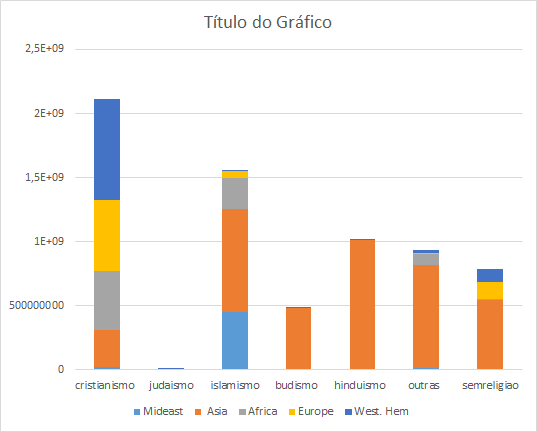


In [ ]:
# Dúvida em como plotar esse gráfico em Python. 

# Seria criar um dataframe a partir de uma tabela pivot e groupby (sum) da base tx4 (2010) para transformar as variáveis de cada religião em linhas e as regiões em colunas?

#Determine a tabela pivot
#pivot = religion.pivot_table(values=['cristianismo', 'judaismo', 'islamismo', 'budismo', 'hinduismo', 'outras', 'semreligiao'], index=['year', 'region'], aggfunc=np.sum)
# print(pivot)

#df1 = pd.pivot_table(religion,
#   index=['year'],
#   values=['budismo', 'hinduismo', 'outras', 'semreligiao'],
#   columns=['region'],
#   fill_value=''
#  )

# Dúvida em como plotar esse gráfico em Python. 

# Seria criar um dataframe a partir de uma tabela pivot e groupby (sum) da base tx4 (2010) para transformar as variáveis de cada religião em linhas e as regiões em colunas?

## Cristianismo

O cristianismo apresenta uma tendência de evolução populacional crescente no período de 1945 (701.350.290 cristãos) a 2010 (2.111.912.953 cristãos), conforme observa-se nos **gráficos 11, 12 **e** 13**. Entretanto, os **gráficos 14, 15 **e** 16** indicam que a proporção dos cristãos em relação ao total populacional dos países tem sido estável desde 1945, cuja média esteve variando em torno de 40% a 45% do total populacionais dos países. Ou seja, o crescimento do cristianismo pode se explicar pelo simples crescimento populacional dos países nesse período. Entretanto, apesar desse crescimento populacional, as taxas de representação do cristianismo nas sociedades mundiais têm se mantido estáveis em torno de 1/3 ao longo dos anos.

In [ ]:
religion.groupby('year')['cristianismo'].sum()

In [ ]:
# Crescimento da Percentagem da população cristianismo 
tx1['cristianismo'].sum()/tx1['population'].sum() #1980
tx2['cristianismo'].sum()/tx2['population'].sum() #1990
tx3['cristianismo'].sum()/tx3['population'].sum() #2000
tx4['cristianismo'].sum()/tx4['population'].sum() #2010

In [ ]:
# Gráfico 11
plt.figure(figsize=(20,10))
sns.lineplot(x='year', y='cristianismo', data=religion)

In [ ]:
# Gráfico 12
sns.set(font_scale=1)
sns.barplot(x='region',y='cristianismo',data=religion,palette="Blues_d")
plt.xticks(rotation=25)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

In [ ]:
#Gráfico 13
plt.figure(figsize=(9,6))
sns.distplot(religion[religion['year']== 1945]['cristianismo'].dropna(), label='1945')
sns.distplot(religion[religion['year']== 2010]['cristianismo'].dropna(), label='2010')
plt.legend()

In [ ]:
religion.groupby('year')['cristianismo'].value_counts()

In [ ]:
religion.groupby('region')['cristianismo'].describe()

In [ ]:
religion.groupby('region')['cristianismo'].median()

In [ ]:
# Gráfico 14
plt.figure(figsize=(20,6))
sns.lineplot(x='year', y='cristianismo_pc', data=religion)

In [ ]:
religion.groupby('region')['cristianismo_pc'].describe()

In [ ]:
religion.groupby('region')['cristianismo'].median()

In [ ]:
#Gráfico 15
plt.figure(figsize=(9,6))
sns.distplot(religion[religion['year']== 1945]['cristianismo_pc'].dropna(), label='1945')
sns.distplot(religion[religion['year']== 2010]['cristianismo_pc'].dropna(), label='2010')
plt.legend()

As maiores médias das taxas relativas da população de cristãos encontram-se nos países do hemisfério ocidental e na Europa cujas respectivas taxas são 88,7% e 70,6% dos habitantes dos países dessas regiões. Entretanto, as menores proporções populacionais de cristãos se encontram nos países do Oriente Médio (4,6% da população) e na Ásia (5,8% da população asiática). Em média, 51,7% da população dos países africanos é cristã. Ver o **gráfico 16** e estatísticas abaixo.

In [ ]:
religion.groupby('region')['cristianismo_pc'].median()

In [ ]:
# Gráfico 16
sns.set(font_scale=1)
sns.barplot(x='region',y='cristianismo_pc',data=religion,palette="Blues_d")
plt.xticks(rotation=25)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

In [ ]:
religion.groupby('region')['cristianismo_pc'].mean()

Em valores absolutos, o** gráfico 12** indica que cerca de 3/4 da população cristã estão concentrados no Ocidente e na Europa. O restante da população se situa basicamente na África e Ásia. Já no Oriente Médio, o cristianismo não é tão expressivo, pois concentra menos de 1% da população cristã. 

In [ ]:
religion.groupby('region')['cristianismo'].mean()/religion.groupby('region')['cristianismo'].mean().sum()

Em 2010, o comportamento mundial do cristianismo continuou concentrado nos países do hemisfério ocidental (786.493.468 cristãos mudiais), europeus (557.677.984 cristãos mundiais) e africanos (460.005.841 cristãos mundiais) - **Gráfico 17**. Entretanto, as estatísticas abaixo indicam que as maiores proporções interregionais estão concentradas no Ocidente (84,7% da população ocidente pertence ao crististianismo), na Ásia (74,6% da população asiática pertence ao crististianismo) e na África (57,5 % da população africana pertence ao crististianismo). 


In [ ]:
# Gráfico 17 - Distribuião da população cristã em 2010
plt.figure(figsize=(9,6))
sns.barplot(x = 'year', y='cristianismo', hue='region', data=tx4.groupby(["year","region"]).sum().reset_index()).set_title('População Cristianismo por região global - 2010')
plt.xticks(rotation=90)

In [ ]:
tx4.groupby('region')['cristianismo'].sum()

In [ ]:
#religion[religion['cristianismo']== religion['cristianismo'].max()]

In [ ]:
tx4.groupby('region')['cristianismo'].sum()/tx4.groupby('region')['population'].sum()

Ao observar o **gráfico 18**, constata-se que os países do hemisfério ocidental tiveram o maior crescimento populacional do cristianismo (maior amplitude interquartílica e maior mediana quando comparadas as regiões globais). A Europa tem o segundo maior contingente do cristianismo (2º maior ponto máximo comparada as regiões).Entretanto, a África e a Ásia tiveram o segundo e terceiro maiores crescimentos do cristianismo interregional (2ª e 3ª maiores amplitudes interquartílicas).

In [ ]:
# Gráfico 18 - Box Plot da população cristã de 1945 a 2010
# 1945 a 2010
#plt.figure(figsize=(9,6))
#sns.boxplot(y='cristianismo',x='region',data=religion)
plt.figure(figsize=(9,10))
sns.boxplot(x='region', y='cristianismo', hue=None, data=religion, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5)

Apesar dos países do hemisfério ocidental que concentrarem a maior população cristã (786.493.468 cristãos mudiais), os países que apresentam as maior concentração mundial foram EUA (312,75 milhões de hab. cristãos), Brasil (190,76 milhões de hab. cristãos), México (112,34 milhões de hab. cristãos), Rússia (142,4 milhões de hab. cristãos) e Filipinas(92,1 milhões de hab. cristãos), conforme indica o **gráfico 19**.

Curioso observar que os países asiáticos da Rússia e das Filipinas se encontram entre as cinco maiores populações mundiais de cristãos.

In [ ]:
# Em 2010
tx10.nlargest(5,'cristianismo')

In [ ]:
# Gráfico 19
tx10_sum = pd.DataFrame(tx10['cristianismo'].groupby(tx10['state']).sum())
tx10_sum = tx10_sum.reset_index().sort_index(by='cristianismo',ascending=False)
most_cont = tx10_sum.head(8)
fig = plt.figure(figsize=(20,10))
plt.title('População Cristianismo x paises.')
sns.set(font_scale=2)
sns.barplot(y='cristianismo',x='state',data=most_cont,palette="Blues_d")
plt.xticks(rotation=45)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

O Yemen e o Kwait não registraram a existência de seguidores cristãos nos seus países, provavelmente, por serem localizados na Ásia e no Oriente Médio, onde a predominância é islâmica, judaica ou hindú. Conforme indica o **gráfico 20**, os países que apresentam as menores concentrações mundiais do cristianismo foram os países africano, ocidental e europeu: Comoros (312,75 milhões de hab. cristãos), Maldives (190,76 milhões de hab. cristãos) e Somália (92,1 milhões de hab. cristãos).

In [ ]:
tx10.nsmallest(5,'cristianismo')

In [ ]:
tx4.nsmallest(5,'cristianismo')

In [ ]:
# Estatística populacionais das religiões
df=tx4.groupby(['cristianismo', 'judaismo','islamismo', 'budismo', 'hinduismo', 'outras', 'semreligiao'])['region'].sum()
df

In [ ]:
# Gráfico 20
tx10_sum = pd.DataFrame(tx10['cristianismo'].groupby(tx10['state']).sum())
tx10_sum = tx10_sum.reset_index().sort_index(by='cristianismo',ascending=True)
most_cont = tx10_sum.head(8)
fig = plt.figure(figsize=(20,10))
plt.title('População Cristianismo x paises.')
sns.set(font_scale=2)
sns.barplot(y='cristianismo',x='state',data=most_cont,palette="Blues_d")
plt.xticks(rotation=45)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

O **gráfico 21** indica uma tendência de crescimento do Cristianismo em todas as regiões mundiais, no período de 1945 a 2010, exceto no Oriente Médio onde o crescimento tem sido baixo e a população absoluta estável com quase ausência de cristãos na sociedade. Observa-se ainda que a Europa apresentou queda em meados da década de 1990, e apresentou queda constante, a partir de 2000. A Ásia também apresentou queda do cristianimo em sua sociedade na 2ª metade da década de 1990, mas voltou a crescer a partir de 2000. 

In [ ]:
# Gráfico 21
plt.figure(figsize=(16,6))
sns.lineplot(x='year', y='cristianismo', hue='region', data=religion)

Ao analisar a população relativa do cristianismo em relação às populações regionais no período de 1945 a 2010, verifica-se no **gráfico 22** que as proporções do cristianismo nas sociedades regionais mundiais tem se mantido estaveis. O Hemisfério Ocidental apresenta as maiores taxas representativas do cristianismo na população dos países ocidentais (cristianismo representa cerca de 90% da população ocidental), enquanto as piores taxas representativas do cristianismo estão localizadas na Ásia e no Oriente Médio, onde menos de 10% das populações dessas regiões se consideram cristãos. 

In [ ]:
# Gráfico 22
plt.figure(figsize=(16,6))
sns.lineplot(x='year', y='cristianismo_pc', hue='region', data=religion)

Ao comparar os **gráficos 23 e 24**, pode se notar que no período de 1980 a 2010, o crescimento populacional do cristianismo ocorre em todas as regiões exceto na Europa. Entretanto, o crescimento relativo do cristianismo em relação às respectivas populações regionais tem ocorrido apenas na África, ainda que as taxas relativas sejam inferiores às taxas do Ocidente. 

In [ ]:
# Gráfico 23

#sns.barplot(x='region', y='cristianismo', data=result, hue='year')

g = sns.catplot(x="region", y="cristianismo", hue="year", data=result,
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Cristianimo (pop.)")

In [ ]:
# Gráfico 24
plt.figure(figsize=(13,10))
sns.barplot(x='region', y='cristianismo_pc', data=result, hue='year')

Conforme visto no gráfico 10, o cristianismo mais presente nos países do Hemisfério Ocidental e da Europa, e o Islamismo é mais presente na Ásia e no Oriente Médio, pergunta-se existe relação entre o contingente populacional das religiões mundiais?

O** gráfico 25** indica que existe uma correlação negativa muito fraca entre o cristianismo e o islamismo. Ou seja, nas regiões onde o cristianismo é alto, o islamismo é baixo. 

É curioso observar que existe uma correlação positiva forte entre a população e os sem religião (0,72). Ou seja, quanto mais cresce a população mundial, maior é o contingente de pessoas sem religião (**Gráfico 25**), aonde esse contingente sem religião mais se concentra é na Ásia e Europa (**Gráfico 26**). Já o contingente de outras religiões se concentram na Ásia (**Gráfico 27**) 

In [ ]:
# Gráfico 25 - Correlação entre o cristianismo, o islamismo, as outras religões e os sem religião.

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(bdcorr.corr(), vmin=-1, vmax=1,ax=ax,cmap='coolwarm',fmt='.2f',
            annot=True)



In [ ]:
# Gráfico 26 
sns.set(font_scale=1)
sns.barplot(x='region',y='outras',data=religion,palette="Blues_d")
plt.xticks(rotation=25)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

In [ ]:
# Gráfico 27
sns.set(font_scale=1)
sns.barplot(x='region',y='semreligiao',data=religion,palette="Blues_d")
plt.xticks(rotation=25)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

# Conclusões

A distribuição geo-demográfica da população mundial flutuou acentuadamente na história. Porém, um pequeno círculo da Ásia concentra mais da metade da população mundial.

Cinco países dominavam este círculo em 2010, sendo China (1.345.174.272), Índia (1.195.000.000), EUA (312.750.000), Indonésia (239.960.000) e Brasil (190.755.800). Estes cinco países representavam 48% da população mundial de 6.830.615.581 de habitantes em 2010. Ou seja, em 2010,basicamente a metade da população mundial vivia dentro de um círculo que tem como destaque cinco países com alta densidade demográfica. 

Em todo o mundo, oito em cada dez pessoas se identificam com algum grupo religioso. Para muitos desses devotos, a religião desempenha um papel fundamental na influência de todos os aspectos da vida cotidiana.

Diferentes religiões podem ser encontradas em todo o globo, embora as maiores religiões do mundo geralmente estejam em um dos cinco principais subgrupos: cristianismo, judaísmo, islamismo, budismo, hinduismo).

A distribuição geográfica dos grupos religiosos varia consideravelmente, apesar da predominância mundial do cristianismo, seguida do islamismo. O cristianismo se concentra, basicamente, na Europa e nos países ocidentais,enquanto a maioria do islamismo situa-se na Ásia e no Oriente Médio.

Existe uma forte correlação positiva entre a população e os sem religião (0,72). Ou seja, quanto mais cresce a população mundial, maior é o contingente de pessoas sem religião, aonde esse contingente sem religião mais se concentra é na Ásia e Europa. Já o contingente de outras religiões se concentram na Ásia.




# Referências Bibliográficas 

KÜNG, Hans. Projeto de ética mundial; uma moral ecumênica em vista da sobrevivência
humana. São Paulo: Paulinas, 1992.

KÜNG, Hans. Religiões do Mundo: em busca dos pontos comuns.Campinas: Verus Editora, 2004

https://wiki.redejuntos.org.br/busca/religioes-do-mundo-coexistencia-do-budismo-religiao-tradicional-chinesa-hinduismo-secularismo

https://www.hipercultura.com/maiores-religioes-do-mundo-mapa/

https://www.pucsp.br/rever/rv4_2001/p_silva.pdf

https://www.a12.com/redacaoa12/igreja/cristianismo-e-budismo-semelhancas-diferencas-e-originalidades-i

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html


## Rascunho 

In [ ]:
(1345174272+1195000000+312750000+239960000+190755800)/tx10['population'].sum()

In [ ]:
tx10['population'].sum()

In [ ]:
# Análise de regresão necessita de outra base (human rights)

#joint das bases result e result1 com a base human rights

# result3 = pd.merge(religion1,hrights, on='region', how='left')

In [ ]:
# importando as libs
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
# é necessário adicionar uma constante a matriz X
#population_sm = sm.add_constant("population")
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
#results = sm.OLS("cristianismo", population_sm).fit()
# mostrando as estatísticas do modelo
#results.summary()
# mostrando as previsões para o mesmo conjunto passado
#results.predict(population_sm)

In [ ]:
#x_v = religion[['population']]#
#y_v = religion[['cristianismo']]
# criando e treinando o modelo
#model = LinearRegression()
#model.fit(x_v, y_v)
# para visualizar os coeficientes encontrados
#model.coef_
# para visualizar o R²
#model.score()
# mostrando as previsões para o mesmo conjunto passado
#model.predict(X_sm)

In [ ]:
#religion['gr_religiosos'] = 0
#if religion['gcristianismo'] >0:
#    religion['gr_religiosos'] = 'cristianismo'
#elif religion['gjudaismo'] 

In [ ]:
sns.set(font_scale=1)
sns.barplot(x='region',y='cristianismo',data=religion,palette="Blues_d")
plt.xticks(rotation=25)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

In [ ]:
sns.set(font_scale=1)
sns.barplot(x='region',y='islamismo',data=religion,palette="Blues_d")
plt.xticks(rotation=25)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()